# Exploratory Data Analysis

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('../datafiles/developer_dataset.csv', low_memory = False)

print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


Counting the number of rows for each columns:

In [7]:
df.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

Calculating descriptive statistics for numerical rows.

In [8]:
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


## Removing highly missing data

Before deciding what data to remove, we need to check the percentage of missing data from each column. To do this, we can use the number of rows in 'RespondentID' since evert respondent gets a unique ID:

In [9]:
maxRows = df['RespondentID'].count()

print('% Missing Data:')
print((1 - df.count() / maxRows) * 100)

% Missing Data:
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


We can see that the last three columns, 'NEWJobHunt', 'NEWJobHuntResearch' and 'NEWLearn', have a missing percentage above 60%, meaning we can safely drop these columns from our DataFrame without affecting the outcome of analysis.

In [10]:
df.drop(['NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn'], axis = 1, inplace = True)

## Developer analysis by country:
We know 'Employment' and 'DevType' both have some missing data, so it is important that we explore how this missing data is distributed for each country. First, we need will group our 'RespondentIDs' by country:

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df[['RespondentID', 'Country']].groupby('Country').count()

,RespondentID
Country,
Canada,8979
China,2072
France,6861
Germany,16215
Japan,1049
Mexico,1918
Spain,4534
United Kingdom,15854
United States,53727


Now, we will see how is the missing data distributed with respect to each country. Notice that the countries with the highest amount of respondents are US, UK and Germany, so we would expect this countries to have the most missing data:

          Country  Employment  DevType
0          Canada         148      944
1           China         139      491
2          France         104      848
3         Germany         386     1691
4           Japan          13      109
5          Mexico          25      207
6           Spain          74      434
7  United Kingdom         196     1472
8   United States         699     4580


c:\Users\TOMAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\TOMAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


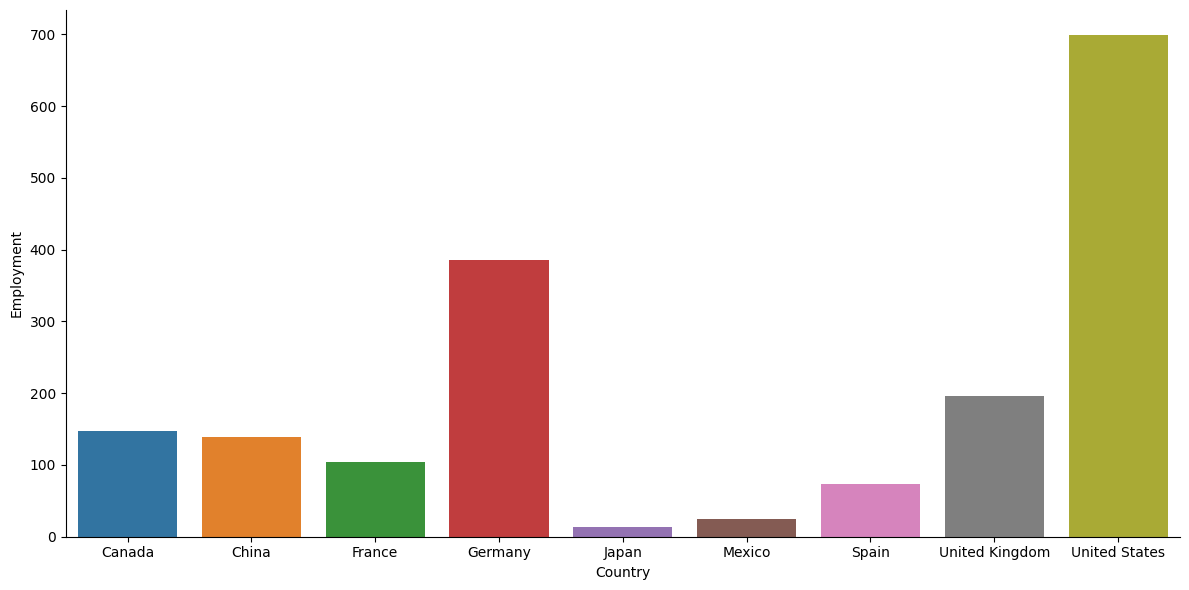

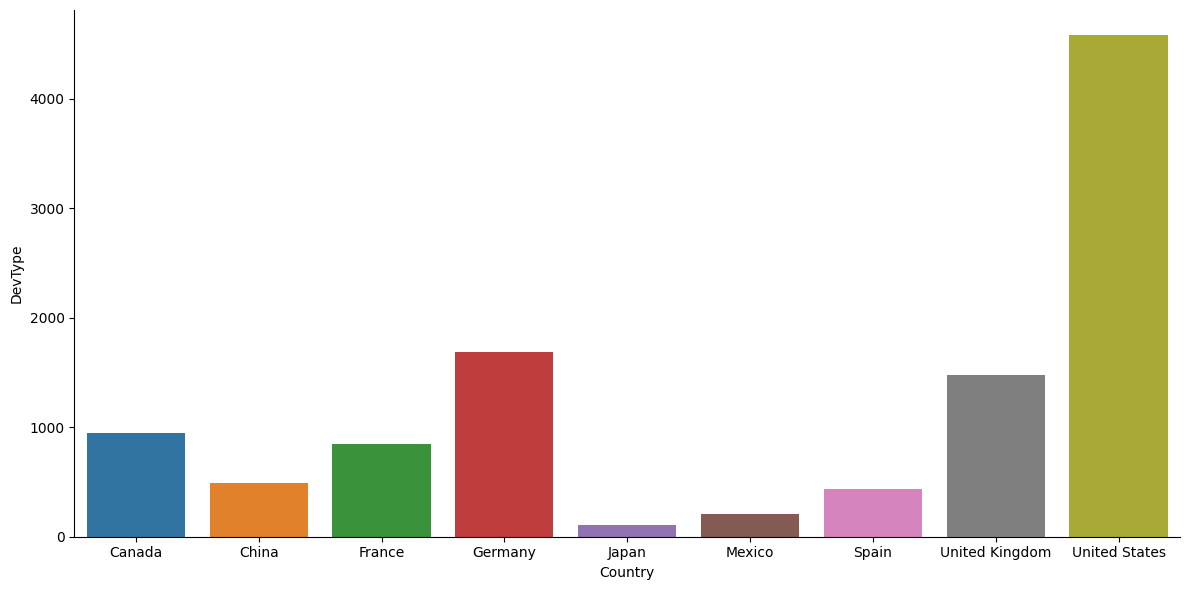

In [12]:
missingData = df[['Employment', 'DevType']].isnull().groupby(df['Country']).sum().reset_index()

print(missingData)

A = sns.catplot(
    data = missingData, kind = 'bar',
    x = 'Country', y = 'Employment',
    height = 6, aspect = 2)

B = sns.catplot(
    data = missingData, kind = 'bar',
    x = 'Country', y = 'DevType',
    height = 6, aspect = 2)

By looking at the above bar charts, it is clear that there is a correlation between the number of respondents from each country and the amount of missing data for Employment and DevType for each country. We will now create a pair of scatter plots to provide more evidence for this relationship: 

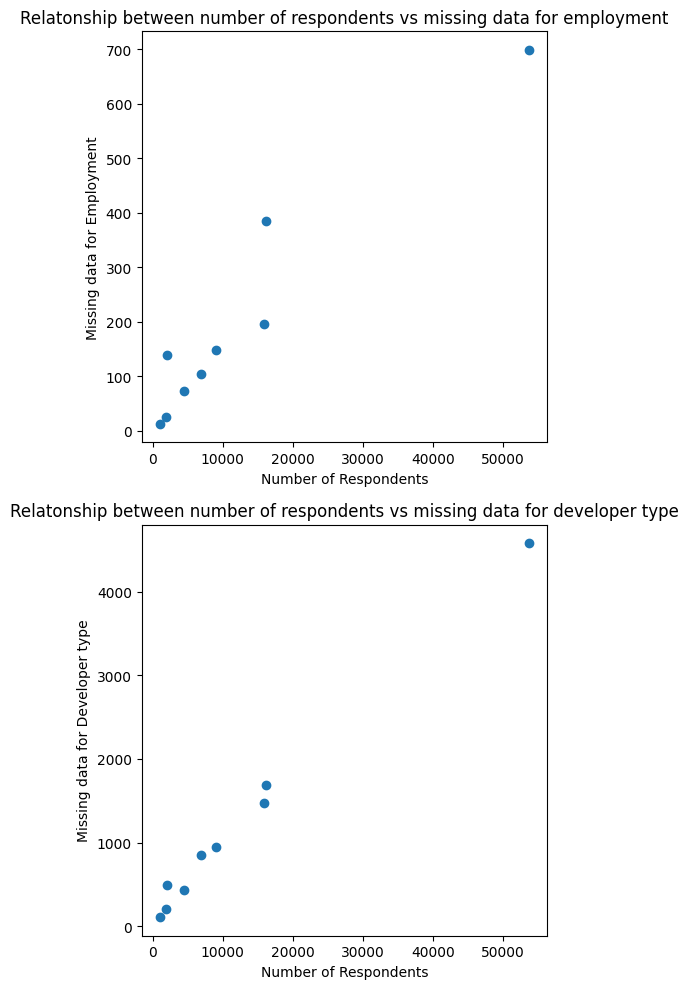

In [13]:
df_count = df[['RespondentID', 'Country']].groupby('Country').count().reset_index()
df_missing = df[['Employment', 'DevType']].isnull().groupby(df['Country']).sum().reset_index()

merged_df = df_count.merge(df_missing, on = 'Country')

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
plt.scatter(merged_df['RespondentID'], merged_df['Employment'])
plt.xlabel('Number of Respondents')
plt.ylabel('Missing data for Employment')
plt.title('Relatonship between number of respondents vs missing data for employment')

# for i, country in enumerate(merged_df['Country']):
#    plt.text(merged_df['RespondentID'][i], merged_df['Employment'][i], country)

plt.subplot(2, 1, 2)
plt.scatter(merged_df['RespondentID'], merged_df['DevType'])
plt.xlabel('Number of Respondents')
plt.ylabel('Missing data for Developer type')
plt.title('Relatonship between number of respondents vs missing data for developer type')

# for i, country in enumerate(merged_df['Country']):
#    plt.text(merged_df['RespondentID'][i], merged_df['DevType'][i], country)

plt.tight_layout()
plt.subplots_adjust(hspace = 0.2)
plt.show()

It is clear that the amount of missing values is related to the relative number of respondents from each country, meaning that the data is MCAR. Therefore, we can safely delete this rows from the columns that we are interested in using for our analysis using Pairwise Deletion for either 'Employment' or 'DevType':

In [14]:
df.dropna(subset = ['Employment', 'DevType'], inplace = True, how = 'any')

To continue with out analysis, we will now analyze the distribution of employment and developer type by country. We will now aggregate the employment data by key developer roles, such as:
* Front-end
* Back-end
* Full-stack
* Mobile development
* Administration roles

c:\Users\TOMAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


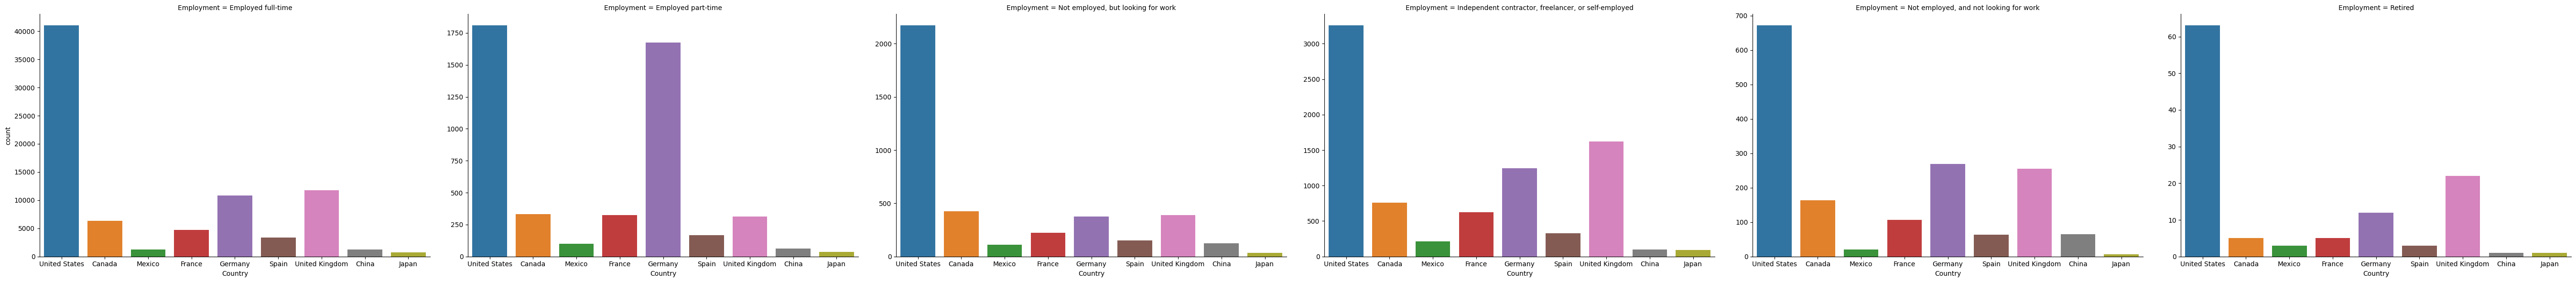

In [15]:
empfig = sns.catplot(x = 'Country', col = 'Employment', data = df, kind = 'count', height = 6, aspect = 1.5, sharey = False)

Now we can focus on the key developer types and their corresponding count grouped by country.

c:\Users\TOMAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


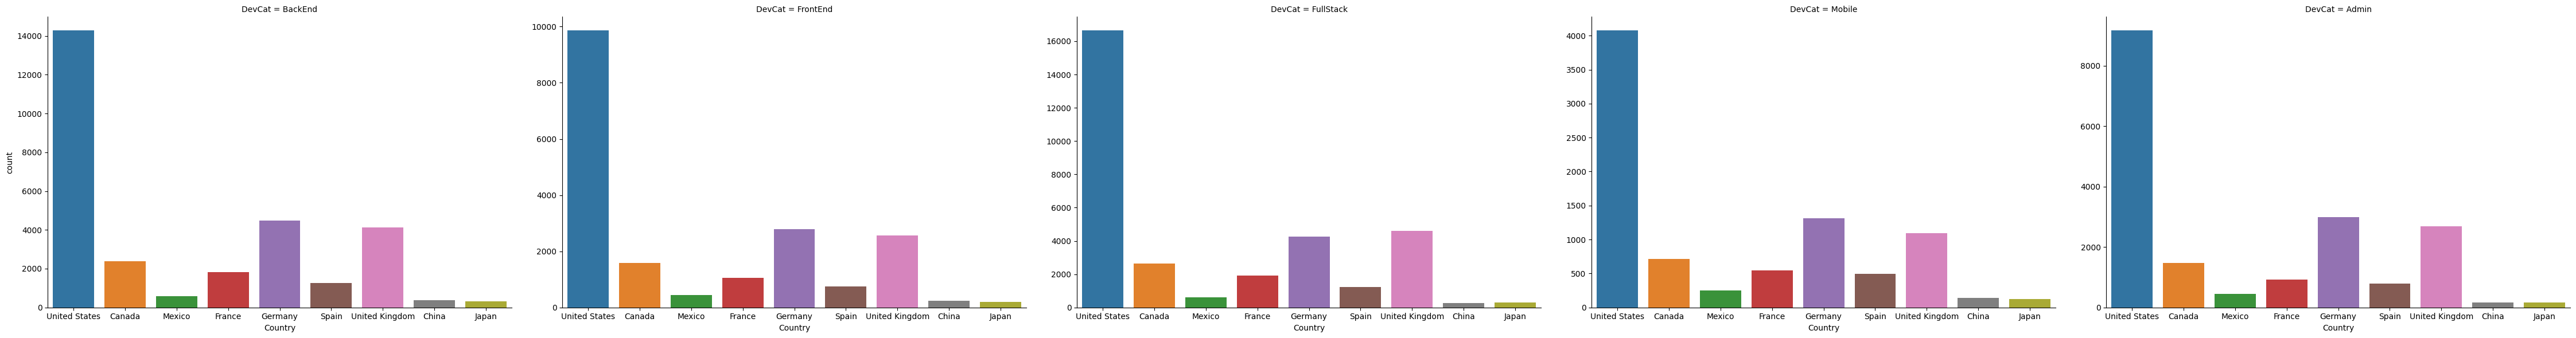

In [16]:
pd.options.mode.chained_assignment = None

devdf = df[['Country', 'DevType']]

devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True

devdf = devdf.melt(id_vars = ['Country'],
                  value_vars = ['BackEnd', 'FrontEnd', 'FullStack', 'Mobile', 'Admin'],
                  var_name = 'DevCat',
                  value_name = 'DevFlag')

devdf.dropna(how = 'any', inplace = True)

devFig = sns.catplot(x = 'Country', col = 'DevCat', data = devdf, kind = 'count', height = 6, aspect = 1.5, sharey = False)

## Investigate developer undergrad majors
To have a better understanding of the background for each type of developer, we will look at the overall trend in majors year over year for respondents. Previously, we noticed that 11% of the data for 'UndergradMajor' is missing. Let's see how this distribution of missing majors looks using a bar chart.

c:\Users\TOMAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


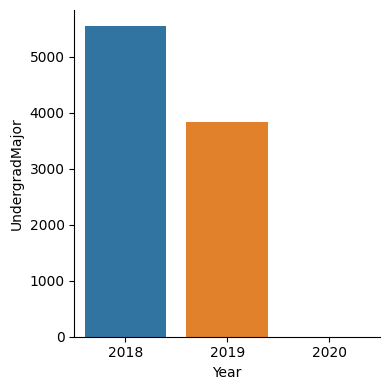

In [17]:
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()

sns.catplot(x = 'Year', y = 'UndergradMajor', data = missingUndergrad, kind = 'bar', height = 4, aspect = 1);

Since every participant from the 2020 filled in an undergrad major, we want to carry this information backwards to fill the missing data since this is the educational background they would carry into a job search:

In [18]:
df = df.sort_values(['RespondentID', 'Year'])

df['UndergradMajor'].bfill(axis = 0, inplace = True)

We will now analyze the major distribution for each year, using a vertical bar chart:

c:\Users\TOMAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


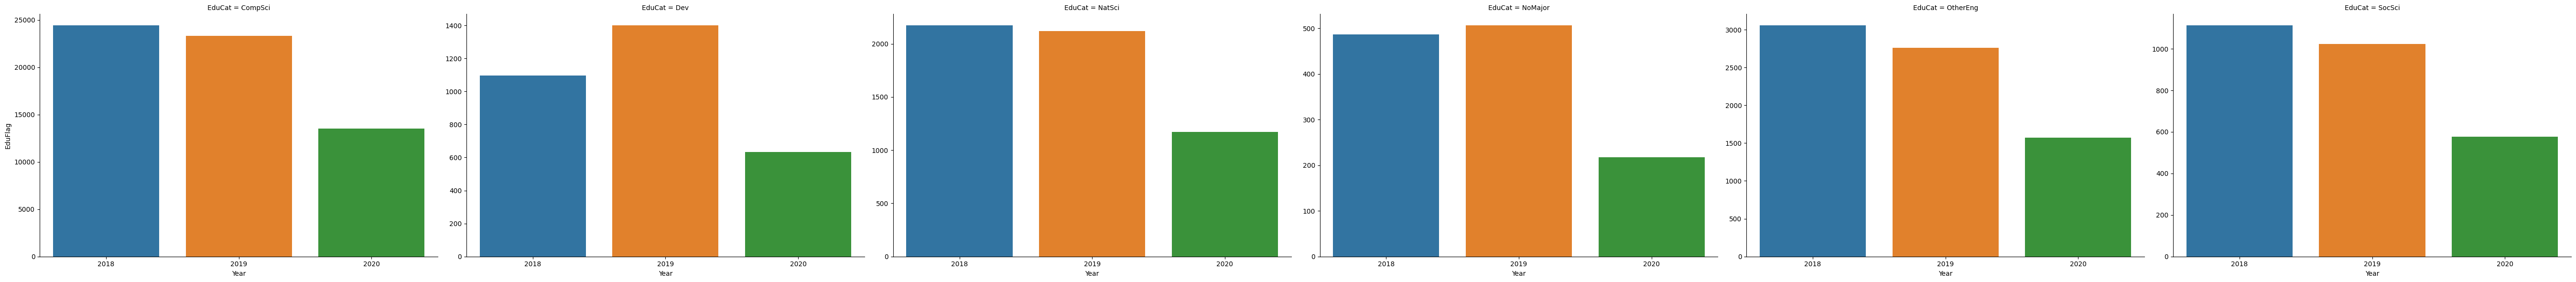

In [19]:
# Key major groups outlined in the StackOverflow survey

majors = ['social science', 'natural science', 'computer science', 'development', 'another engineering', 'never declared']

edudf = df[['Year', 'UndergradMajor']]
edudf.dropna(how = 'any', inplace = True)

edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NatSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'CompSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'Dev'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True

edudf = edudf.melt(id_vars = ['Year'], value_vars = ['SocSci', 'NatSci', 'CompSci', 'Dev', 'OtherEng', 'NoMajor'],
                  var_name = 'EduCat',
                  value_name = 'EduFlag')

edudf.dropna(how = 'any', inplace = True)
edudf = edudf.groupby(['Year', 'EduCat']).count().reset_index()

eduFig = sns.catplot(x = 'Year', y = 'EduFlag', col = 'EduCat', data = edudf, kind = 'bar',
                     height = 6, aspect = 1.5, sharey = False);

Clearly, most majors that move into the workforce have a background in Computer Science. Besides that, we can see a drop in the number of majors entering the workforce in 2020 for all groups. This might be related to the dates that the survey was carried out. Apart from Comp Sci majors, the next groups also have a significant amount of people entering the market:
* Natural Science
* Software Development
* Other Engineerings

## Relationship between years of experience and compensation
Years of experience are an important metric when looking to understand the general skill and technical capabilities of potential candidates. Compensation is also important to understand the rate for a particular developer in today's market. For this, let's run a exploratory data analysis for both 'YearsCodePro' and 'ConvertedComp':

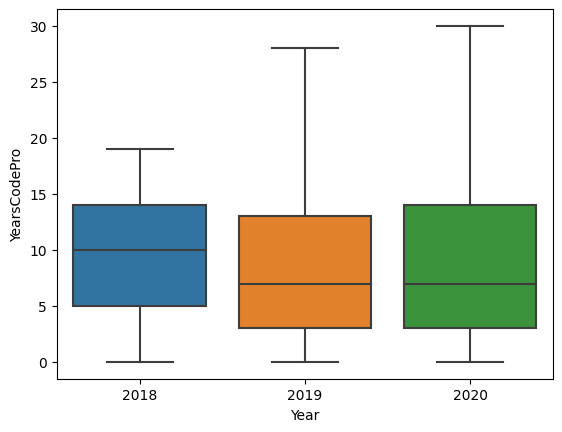

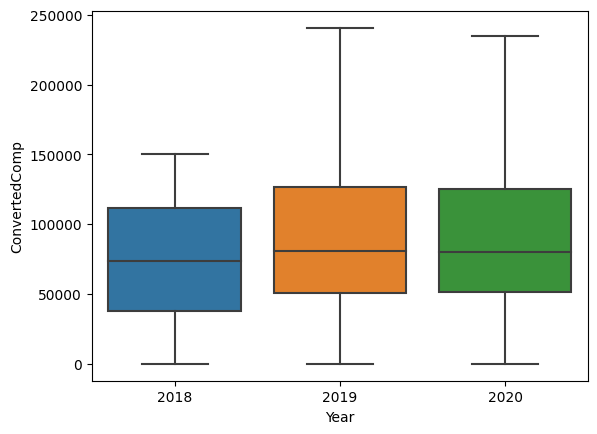

In [20]:
compFields = df[['Year', 'YearsCodePro', 'ConvertedComp']]

D = sns.boxplot(x = 'Year', y = 'YearsCodePro', data = compFields, showfliers = False)
plt.show()

E = sns.boxplot(x = 'Year', y = 'ConvertedComp', data = compFields, showfliers = False)
plt.show()

We will now use multiple imputation to fill the missing values for both columns, so we can create data points that are indicative of the overall trend of the original data:

In [21]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

imputedf = df[['YearsCodePro', 'ConvertedComp']]

traindf, testdf = train_test_split(imputedf, train_size = 0.1)

imp = IterativeImputer(max_iter = 20, random_state = 0)

imp.fit(imputedf)

compdf = pd.DataFrame(np.round(imp.transform(imputedf), 0), columns = ['YearsCodePro', 'ConvertedComp'])

compdf.isnull().sum()

YearsCodePro     0
ConvertedComp    0
dtype: int64

<Axes: xlabel='CodeYearsBins', ylabel='ConvertedComp'>

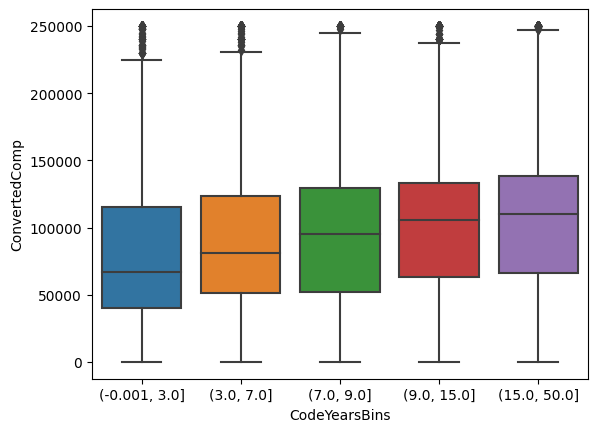

In [22]:
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 250000]

compPlotdf['CodeYearsBins'] = pd.qcut(compPlotdf['YearsCodePro'], q = 5)

sns.boxplot(x = 'CodeYearsBins', y = 'ConvertedComp', data = compPlotdf)